<a href="https://colab.research.google.com/github/Luca-Agazzi/Luca-Agazzi/blob/main/GBM-EniMI_test_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import yfinance as yf
import pandas as pd

# Scarica i dati storici di Eni (ENI.MI)
ticker = 'ENI.MI'
data = yf.download(ticker, start='2015-01-01', end='2023-01-01')

# Resample per ottenere dati settimanali e mensili
weekly_data = data['Close'].resample('W').last()
monthly_data = data['Close'].resample('M').last()

print(weekly_data.head())
print(monthly_data.head())

[*********************100%%**********************]  1 of 1 completed

Date
2015-01-04    14.59
2015-01-11    13.62
2015-01-18    14.47
2015-01-25    15.05
2015-02-01    14.90
Freq: W-SUN, Name: Close, dtype: float64
Date
2015-01-31    14.900000
2015-02-28    16.680000
2015-03-31    16.129999
2015-04-30    17.180000
2015-05-31    16.389999
Freq: M, Name: Close, dtype: float64


In [2]:
import numpy as np

# Calcola i ritorni logaritmici
log_returns_weekly = np.log(weekly_data / weekly_data.shift(1)).dropna()
log_returns_monthly = np.log(monthly_data / monthly_data.shift(1)).dropna()

print(log_returns_weekly.head())
print(log_returns_monthly.head())

Date
2015-01-11   -0.068797
2015-01-18    0.060538
2015-01-25    0.039300
2015-02-01   -0.010017
2015-02-08    0.043342
Freq: W-SUN, Name: Close, dtype: float64
Date
2015-02-28    0.112849
2015-03-31   -0.033530
2015-04-30    0.063065
2015-05-31   -0.047075
2015-06-30   -0.029095
Freq: M, Name: Close, dtype: float64


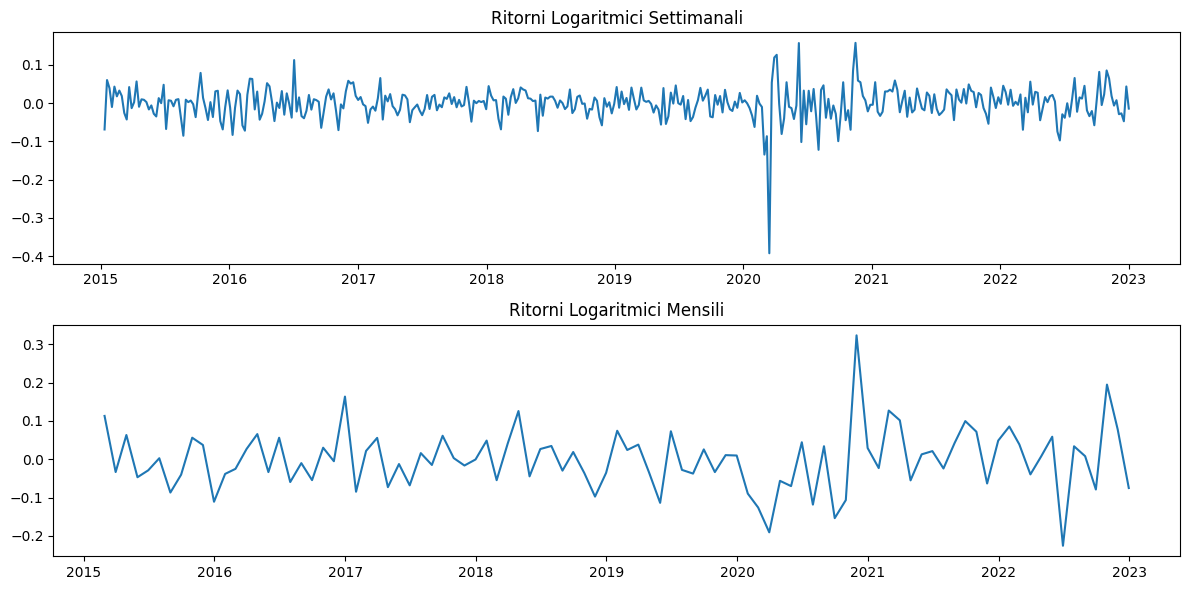

ADF Test settimanale: (-13.421861883491221, 4.174522856634485e-25, 2, 414, {'1%': -3.4462444670071046, '5%': -2.8685466682709975, '10%': -2.5705023309762187}, -1407.5097905614718)
ADF Test mensile: (-4.6885103483839945, 8.843597166306873e-05, 2, 92, {'1%': -3.503514579651927, '5%': -2.893507960466837, '10%': -2.583823615311909}, -176.1646728515168)


In [3]:
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Plot dei ritorni logaritmici settimanali e mensili
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(log_returns_weekly)
plt.title('Ritorni Logaritmici Settimanali')

plt.subplot(2, 1, 2)
plt.plot(log_returns_monthly)
plt.title('Ritorni Logaritmici Mensili')
plt.tight_layout()
plt.show()

# Test ADF per la stazionarietà
adf_weekly = adfuller(log_returns_weekly)
adf_monthly = adfuller(log_returns_monthly)
print(f"ADF Test settimanale: {adf_weekly}")
print(f"ADF Test mensile: {adf_monthly}")

count    417.000000
mean      -0.000225
std        0.041509
min       -0.392601
25%       -0.019636
50%        0.002112
75%        0.021376
max        0.157769
Name: Close, dtype: float64
count    95.000000
mean     -0.001207
std       0.079292
min      -0.225824
25%      -0.045946
50%       0.002509
75%       0.041503
max       0.323026
Name: Close, dtype: float64


Text(0.5, 1.0, 'Q-Q Plot dei Ritorni Logaritmici Settimanali')

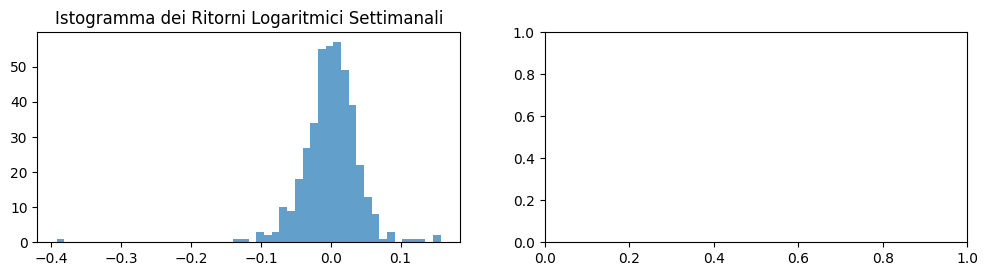

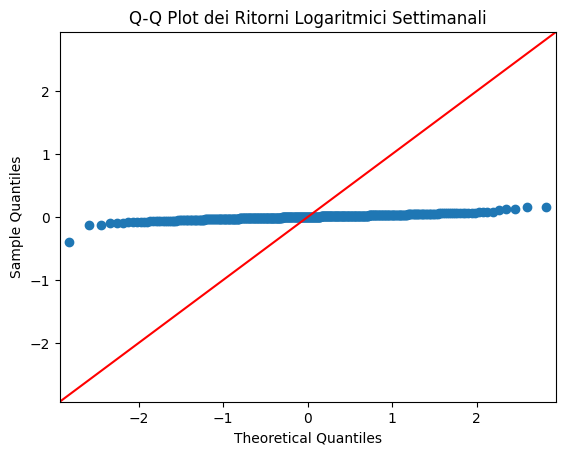

In [4]:
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Verifica che log_returns_weekly e log_returns_monthly non siano vuoti
print(log_returns_weekly.describe())
print(log_returns_monthly.describe())

# Grafico Q-Q per i ritorni logaritmici settimanali
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.hist(log_returns_weekly, bins=50, alpha=0.7)
plt.title('Istogramma dei Ritorni Logaritmici Settimanali')

plt.subplot(2, 2, 2)
sm.qqplot(log_returns_weekly, line ='45')
plt.title('Q-Q Plot dei Ritorni Logaritmici Settimanali')

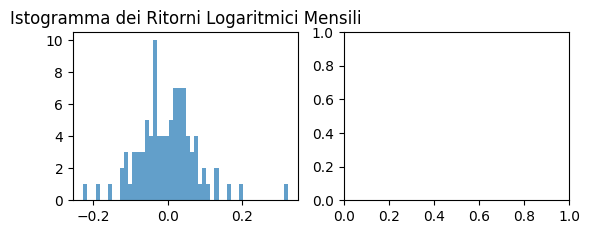

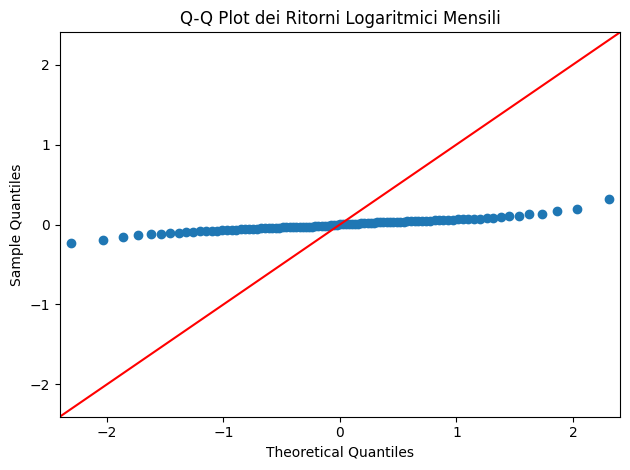

In [5]:
# Grafico Q-Q per i ritorni logaritmici mensili
plt.subplot(2, 2, 3)
plt.hist(log_returns_monthly, bins=50, alpha=0.7)
plt.title('Istogramma dei Ritorni Logaritmici Mensili')

plt.subplot(2, 2, 4)
sm.qqplot(log_returns_monthly, line ='45')
plt.title('Q-Q Plot dei Ritorni Logaritmici Mensili')
plt.tight_layout()
plt.show()

In [6]:
# Test di Shapiro-Wilk per la normalità
shapiro_weekly = stats.shapiro(log_returns_weekly)
shapiro_monthly = stats.shapiro(log_returns_monthly)
print(f"Shapiro-Wilk Test settimanale: {shapiro_weekly}")
print(f"Shapiro-Wilk Test mensile: {shapiro_monthly}")

Shapiro-Wilk Test settimanale: ShapiroResult(statistic=0.8740843534469604, pvalue=6.595169753708781e-18)
Shapiro-Wilk Test mensile: ShapiroResult(statistic=0.9653091430664062, pvalue=0.012764859944581985)


In [7]:
from statsmodels.tsa.stattools import adfuller

def hurst_exponent(ts):
    lags = range(2, 20)
    tau = [np.std(np.subtract(ts[lag:], ts[:-lag])) for lag in lags]
    poly = np.polyfit(np.log(lags), np.log(tau), 1)
    return poly[0] * 2.0

hurst_weekly_alt = hurst_exponent(log_returns_weekly.values)
hurst_monthly_alt = hurst_exponent(log_returns_monthly.values)
print(f"Esponente di Hurst alternativo settimanale: {hurst_weekly_alt}")
print(f"Esponente di Hurst alternativo mensile: {hurst_monthly_alt}")

Esponente di Hurst alternativo settimanale: -0.020666138748117773
Esponente di Hurst alternativo mensile: 0.06209755337526745


In [8]:
# Stima dei parametri del modello GBM
mu_weekly = log_returns_weekly.mean() * 52  # annualizzato
sigma_weekly = log_returns_weekly.std() * np.sqrt(52)  # annualizzato

mu_monthly = log_returns_monthly.mean() * 12  # annualizzato
sigma_monthly = log_returns_monthly.std() * np.sqrt(12)  # annualizzato

print(f"Stima di mu (drift) settimanale: {mu_weekly}")
print(f"Stima di sigma (volatilità) settimanale: {sigma_weekly}")
print(f"Stima di mu (drift) mensile: {mu_monthly}")
print(f"Stima di sigma (volatilità) mensile: {sigma_monthly}")

Stima di mu (drift) settimanale: -0.011675122900720413
Stima di sigma (volatilità) settimanale: 0.2993261385222684
Stima di mu (drift) mensile: -0.01448214557764364
Stima di sigma (volatilità) mensile: 0.2746767794773888


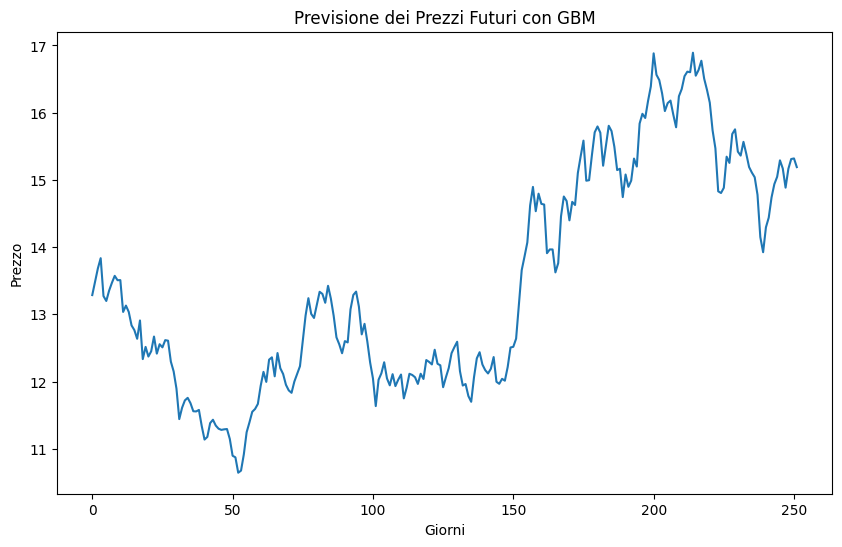

In [9]:
# Previsione dei prezzi futuri usando il modello GBM
num_days = 252  # un anno di trading
last_price = data['Close'][-1]

# Generazione di traiettorie future del prezzo usando GBM
dt = 1/252
prices = np.zeros(num_days)
prices[0] = last_price

for t in range(1, num_days):
    shock = np.random.normal(loc=mu_weekly*dt, scale=sigma_weekly*np.sqrt(dt))
    prices[t] = prices[t-1] * np.exp(shock)

# Plot dei prezzi futuri previsti
plt.figure(figsize=(10, 6))
plt.plot(prices)
plt.title('Previsione dei Prezzi Futuri con GBM')
plt.xlabel('Giorni')
plt.ylabel('Prezzo')
plt.show()

In [10]:
# Raccolta dei dati effettivi fino al 2024-01-01
actual_data = yf.download(ticker, start='2023-01-02', end='2024-01-02')
actual_prices = actual_data['Close']


[*********************100%%**********************]  1 of 1 completed


In [11]:
import numpy as np

# Funzione per predire i prezzi con il modello GBM
def predict_gbm(S0, mu, sigma, T, dt):
    n_steps = int(T / dt)
    t = np.linspace(0, T, n_steps)
    W = np.random.standard_normal(size=n_steps)
    W = np.cumsum(W) * np.sqrt(dt)  # Calcolo del moto browniano
    X = (mu - 0.5 * sigma**2) * t + sigma * W
    S = S0 * np.exp(X)  # Prezzo predetto
    return S

# Parametri stimati (mu e sigma annualizzati)
S0 = data['Close'][-1]  # Prezzo iniziale al 2023-01-01
T = 1  # Un anno
dt = 1/252  # Incremento giornaliero

# Previsione dei prezzi per un anno
predicted_prices = predict_gbm(S0, mu_weekly, sigma_weekly, T, dt)
predicted_dates = pd.date_range(start='2023-01-02', periods=len(predicted_prices), freq='B')

predicted_series = pd.Series(predicted_prices, index=predicted_dates)


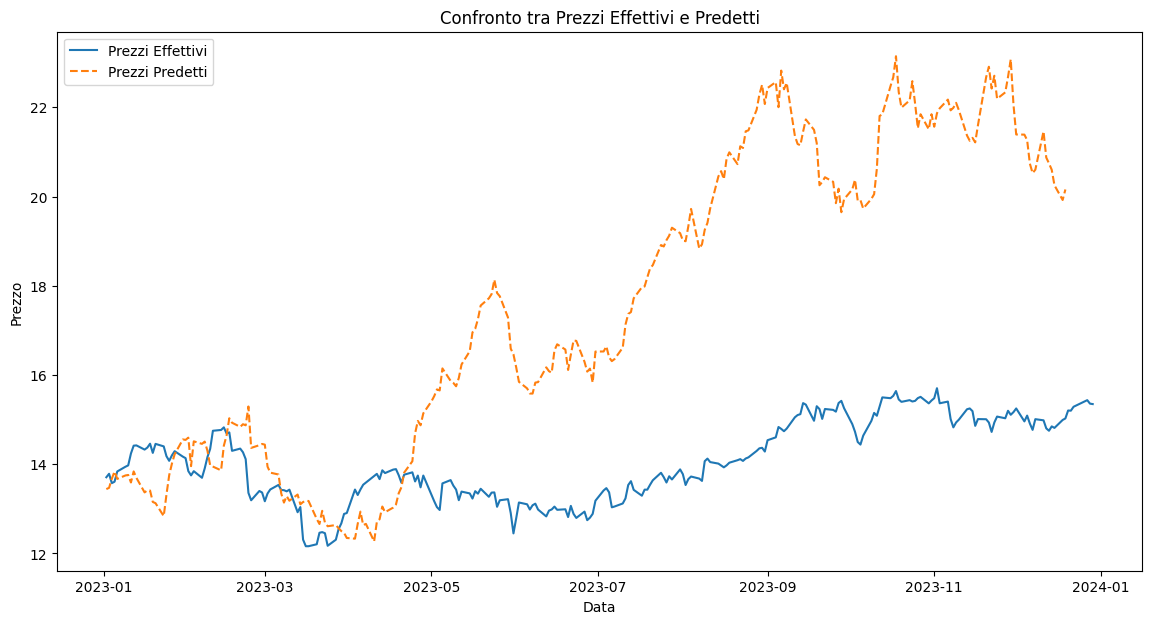

In [12]:
# Confronto dei prezzi predetti con quelli effettivi
plt.figure(figsize=(14, 7))
plt.plot(actual_prices.index, actual_prices, label='Prezzi Effettivi')
plt.plot(predicted_series.index, predicted_series, label='Prezzi Predetti', linestyle='--')
plt.title('Confronto tra Prezzi Effettivi e Predetti')
plt.xlabel('Data')
plt.ylabel('Prezzo')
plt.legend()
plt.show()

Mean Squared Error: 20.534913094447116


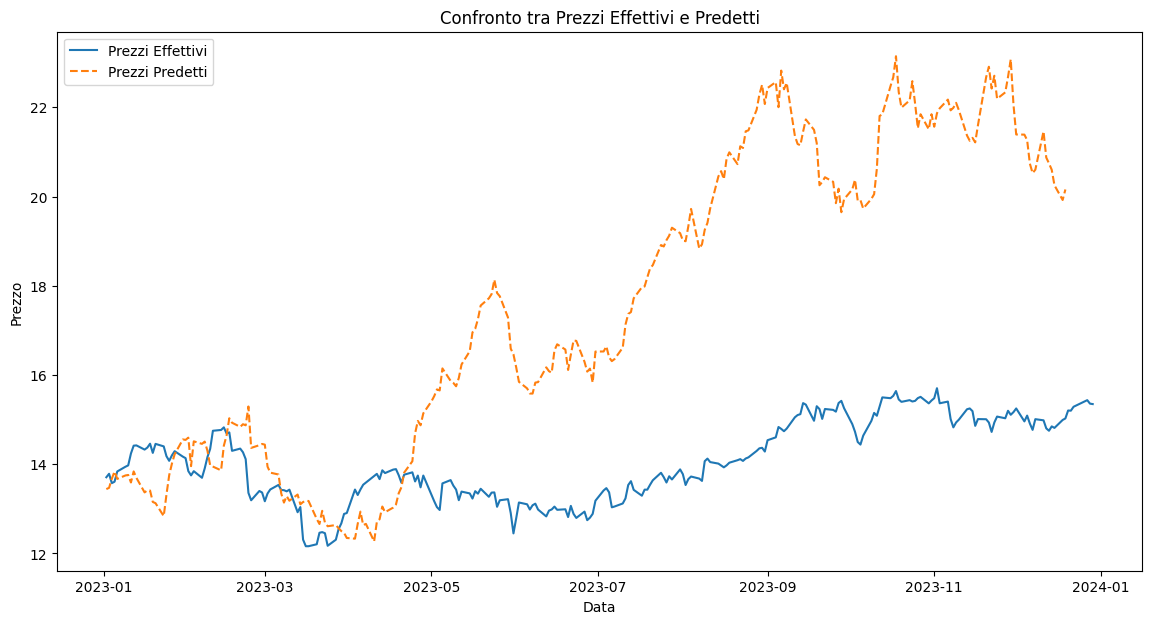

In [14]:
from sklearn.metrics import mean_squared_error

# Allineamento delle date
aligned_actual = actual_prices.reindex(predicted_series.index).dropna()
aligned_predicted = predicted_series[aligned_actual.index]

# Calcolo del Mean Squared Error
mse = mean_squared_error(aligned_actual, aligned_predicted)
print(f"Mean Squared Error: {mse}")

# Opzionale: Aggiungi un grafico con il MSE se desideri visualizzare anche l'errore
plt.figure(figsize=(14, 7))
plt.plot(actual_prices.index, actual_prices, label='Prezzi Effettivi')
plt.plot(predicted_series.index, predicted_series, label='Prezzi Predetti', linestyle='--')
plt.title('Confronto tra Prezzi Effettivi e Predetti')
plt.xlabel('Data')
plt.ylabel('Prezzo')
plt.legend()
plt.show()


In [15]:
# Calcolo della media dei valori effettivi
mean_actual = aligned_actual.mean()

# Calcolo del Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calcolo dell'errore percentuale rispetto alla media dei dati reali
error_percentage = (rmse / mean_actual) * 100
print(f"Errore Percentuale (RMSE): {error_percentage:.2f}%")

Errore Percentuale (RMSE): 32.30%


Mean Squared Error (Gennaio 2023 - Aprile 2023): 0.4733461527714611
Errore Percentuale (RMSE): 5.04%


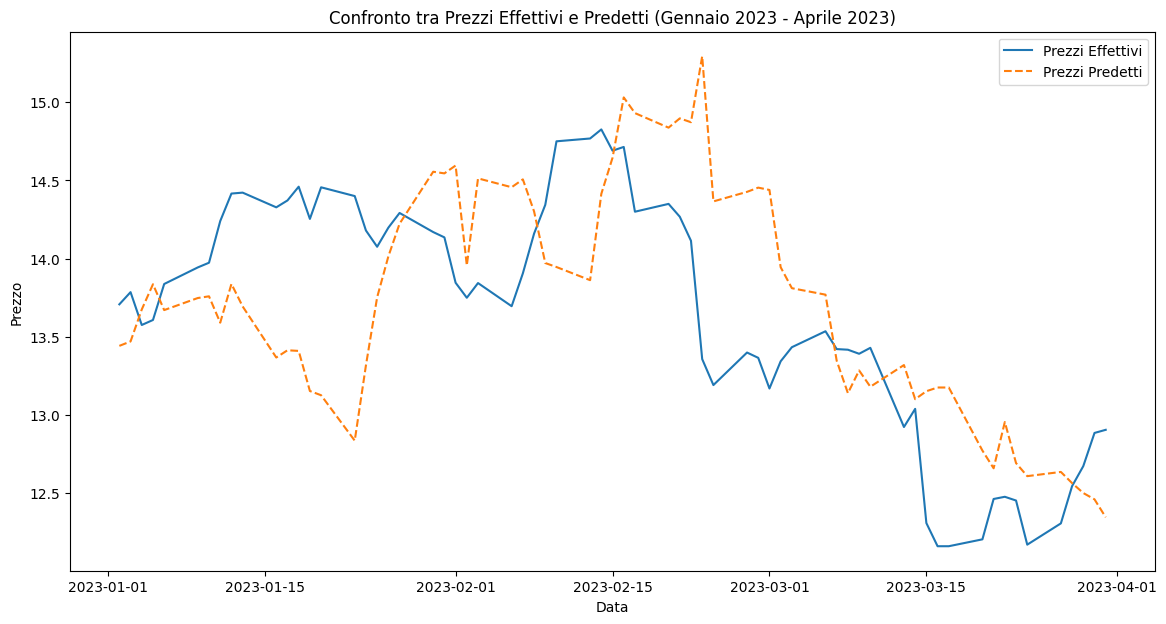

In [19]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Estrai i dati effettivi dal gennaio 2023 fino al maggio 2023
start_date = '2023-01-01'
end_date = '2023-04-01'

# Filtra i dati effettivi per il periodo specificato
actual_data_filtered = actual_data.loc[start_date:end_date]
actual_prices_filtered = actual_data_filtered['Close']

# Filtra le previsioni per il periodo specificato
predicted_series_filtered = predicted_series[start_date:end_date]

# Allinea i dati effettivi e predetti per il periodo specificato
aligned_actual_filtered = actual_prices_filtered.reindex(predicted_series_filtered.index).dropna()
aligned_predicted_filtered = predicted_series_filtered[aligned_actual_filtered.index]

# Calcola l'MSE per il periodo specificato
mse_filtered = mean_squared_error(aligned_actual_filtered, aligned_predicted_filtered)
print(f"Mean Squared Error (Gennaio 2023 - Aprile 2023): {mse_filtered}")

# Calcola il RMSE per il periodo specificato
rmse_filtered = np.sqrt(mse_filtered)

# Calcola la media dei valori effettivi
mean_actual_filtered = aligned_actual_filtered.mean()

# Calcola l'errore percentuale rispetto alla media dei dati reali
error_percentage = (rmse_filtered / mean_actual_filtered) * 100
print(f"Errore Percentuale (RMSE): {error_percentage:.2f}%")

# (Opzionale) Visualizza il confronto per il periodo specificato
plt.figure(figsize=(14, 7))
plt.plot(actual_prices_filtered.index, actual_prices_filtered, label='Prezzi Effettivi')
plt.plot(predicted_series_filtered.index, predicted_series_filtered, label='Prezzi Predetti', linestyle='--')
plt.title('Confronto tra Prezzi Effettivi e Predetti (Gennaio 2023 - Aprile 2023)')
plt.xlabel('Data')
plt.ylabel('Prezzo')
plt.legend()
plt.show()